In [1]:
import re
import sqlite3
from pymystem3 import Mystem
from thisapidoesnotexist import get_cat
from matplotlib import pyplot as plt

conn = sqlite3.connect('stihi.db')
c = conn.cursor()
m = Mystem()
c.execute("CREATE TABLE IF NOT EXISTS 'Stihi'('id' integer PRIMARY KEY AUTOINCREMENT, 'word1', 'lemma1', 'pos1', 'word2', 'lemma2', 'pos2', 'word3', 'lemma3', 'pos3', 'texts' text, 'url')")

Функции, которые парсят запрос и показывают, по каким параметрам фильтровать.

In [38]:
def choose_col(wrd):
    cols = [] 
    if '+' in wrd:
        wrd = wrd.split('+')
        if not re.fullmatch('[A-Z]+', wrd[1]) or re.fullmatch('[A-Z]+', wrd[0]):
            cols = 'Вы неправильно ввели запрос. Попробуйте ещё раз.'
            see_cat = False
            return cols, see_cat
    else:
        wrd = [wrd] 
    for w in wrd:
        see_cat = False
        if re.fullmatch('"[а-яёа́е́и́о́у́ы́э́ю́я́-]+"', w.lower()):
            cols.append(('word', w[1:-1].lower()))
            if m.lemmatize(w[1:-1])[0] == 'кот' or m.lemmatize(w[1:-1])[0] == 'кошка' or m.lemmatize(w[1:-1])[0] == 'котенок':
                see_cat = True
        elif re.fullmatch('[а-яёа́е́и́о́у́ы́э́ю́я́-]+', w.lower()):
            cols.append(('lemma', w.lower()))
            if w.lower() == 'кот' or w.lower() == 'кошка' or w.lower() == 'котенок':
                see_cat = True
        elif re.fullmatch('[A-Z]+', w):
            cols.append(('pos', w))
        else:
            cols = 'Вы неправильно ввели запрос. Попробуйте ещё раз.'
            return cols, see_cat
        
    return cols, see_cat


def get_col_name(entry):
    words = entry.split()
    dic_filters = {} 
    for i in range(len(words)):
        cols, see_cat = choose_col(words[i])
        if cols == 'Вы неправильно ввели запрос. Попробуйте ещё раз.':
            return cols, see_cat
          
        for j in cols:
            fil = j[0] + str(i + 1)
            dic_filters[fil] = j[1]
    return dic_filters, see_cat

Сюрприз для кошатников. Ищем котячьи координаты носа, чтобы сделать буп.

In [39]:
def show_cat():
    cat = get_cat()
    cat.hash
    cat.new_image()
    cat.save_image('cat.jpeg')

    img = plt.imread('cat.jpeg')
    plt.imshow(img)
    plt.show()

Функция, ищущая в базе нужные предложения.

In [40]:
def search(entry):
    filtrs, see_cat = get_col_name(entry)
    if filtrs == 'Вы неправильно ввели запрос. Попробуйте ещё раз.':
        print(filtrs)
        return
    whr = "SELECT texts, url FROM Stihi WHERE "
    l = ""
    k = 0
    vs = []
    for f in filtrs:
        if k != 0:
            l += " AND " + f + "=" + '?'
            vs.append(filtrs[f])
        else:
            k += 1
            l += f + "=" + '?'
            vs.append(filtrs[f])
    whr += l
    c.execute(whr, tuple(vs))
    ans = c.fetchall()
    if len(ans) == 0:
        print('Извините, ничего не найдено')
        return
    ss = []
    i = 1
    for text, ur in ans:
        if (text, ur) not in ss:
            print(str(i) + ') ' + text + ' [' + ur + ']')
            ss.append((text, ur))
            i += 1
    if see_cat == True:
        show_cat()

In [41]:
search('ADV+V')

Вы неправильно ввели запрос. Попробуйте еще раз.


1) И множество шрамов.. А был он когда-то Приятным на вид полосатым котом. [https://rustih.ru/igor-mazunin-urodlivyj-kot/]
2) Хотя и не совсем Был убежден Котом своим хозяин, Но уж не раз случалось замечать Ему, как этот Кот искусно вел Войну против мышей и крыс, какие Выдумывал он хитрости и как То, мертвым притворясь, висел на лапах Вниз головой, то пудрился мукой, То прятался в трубу, то под кадушкой Лежал, свернувшись в ком; а потому И слов Кота не пропустил он мимо Ушей. [https://rustih.ru/vasilij-zhukovskij-kot-v-sapogax/]
3) Он был хорошим, добрым котом, но я его не любила… [https://rustih.ru/veronika-tushnova-kotenok/]


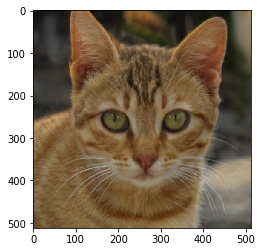

In [42]:
search('A "котом"')

In [43]:
search('спать+S')

Извините, ничего не найдено


In [44]:
search('спать+V')

1) Потому что спать любил. [https://rustih.ru/vladimir-stepanov-kruglyj-kot/]
2) С этих пор, который год, Спать не может ночью кот. [https://rustih.ru/vladimir-stepanov-kruglyj-kot/]
3) 7 Ясные звёзды в небе зажглись, Дети поели и спать улеглись. [https://rustih.ru/aleksandr-vvedenskij-skazka-o-chetyrex-kotyatax-i-chetyrex-rebyatax/]
4) Но к ночи начал накрапывать дождь, в небе загромыхало… Я не хотела ни спать, ни есть — мерещился мне котенок, голодный, продрогший, промокший весь среди дождливых потемок. [https://rustih.ru/veronika-tushnova-kotenok/]
5) Молчу… Как же это мама догадалась, что теперь я только спать хочу?! [https://rustih.ru/robert-rozhdestvenskij-aleshkiny-mysli/]
6) Потом, подумав, перестал: да это же я спать устал! [https://rustih.ru/robert-rozhdestvenskij-aleshkiny-mysli/]
7) Влез в кувшин — Перевернулся, Чуть совсем не захлебнулся И улёгся на кровать Спать… Мы щенка в воде и мыле Два часа мочалкой мыли. [https://rustih.ru/sergej-mixalkov-trezor/]
8) Вдоль глухих осе